# K-Means Clustering — From Scratch

In this notebook, we implement the **K-Means clustering algorithm** from scratch using only NumPy.

We will:

- Generate a 2D dataset  
- Implement K-Means step-by-step  
- Visualize clusters and centroids  
- Evaluate convergence behavior  

K-Means is an **unsupervised learning algorithm** used to partition data into K clusters based on similarity.

##  What is K-Means?

K-Means aims to find **K clusters** by minimizing the distance between points and their assigned centroid.

Objective function:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

Where:

- $K$ — number of clusters  
- $C_i$ — cluster i  
- $\mu_i$ — centroid of cluster i  
- $\| x - \mu_i \|^2$ — squared Euclidean distance  

### Steps:

1. Initialize K centroids randomly  
2. Assign each point to the nearest centroid  
3. Update centroids  
4. Repeat until convergence  


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(42)

## 1. Create a Synthetic Dataset

We generate 3 clusters of points for K-Means to discover.

In [3]:
def make_blobs(centers, n_samples=120, std=0.8):
    X = []
    for center in centers:
        points = np.random.randn(n_samples, 2) * std + center
        X.append(points)
    return np.vstack(X)

centers = [(-5, -2), (0, 5), (6, 0)]
X = make_blobs(centers)


## 2. Visualize Dataset

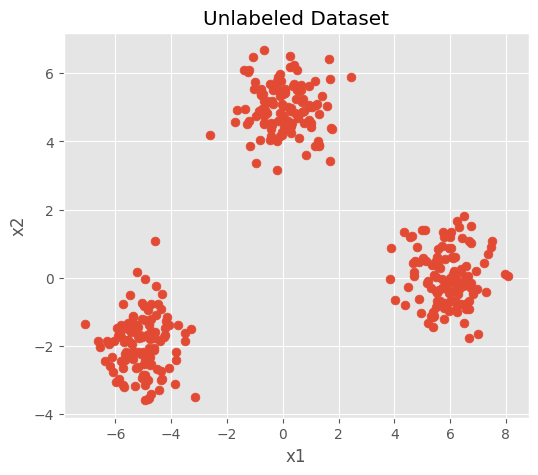

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=40)
plt.title("Unlabeled Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 4. Implement Distance Function

In [5]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

## 5. Implement K-Means Algorithm

In [6]:
def kmeans(X, K=3, max_iters=100):
    
    # 1. Random initialization of centroids
    idx = np.random.choice(len(X), K, replace=False)
    centroids = X[idx]

    for _ in range(max_iters):
        # 2. Assign points to nearest centroid
        labels = np.array([
            np.argmin([euclidean_distance(x, c) for c in centroids])
            for x in X
        ])
        
        # 3. Compute new centroids
        new_centroids = np.array([
            X[labels == k].mean(axis=0) for k in range(K)
        ])
        
        # 4. Check convergence
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids

    return centroids, labels

## 6. Train K-Means

In [7]:
K = 3
centroids, labels = kmeans(X, K)

## 7. Visualize Clusters + Centroids

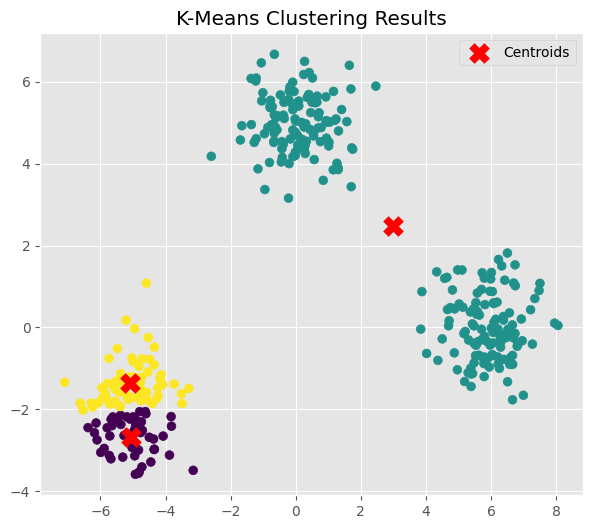

In [8]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis")
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='X', label="Centroids")
plt.legend()
plt.title("K-Means Clustering Results")
plt.show()